<a href="https://colab.research.google.com/github/khchoi-physik/pbh_simulations/blob/main/fem_test_peaks_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1D

[-0.47667321 -0.80378962 -0.52126339  0.48013087  2.88558987 -1.59042012
 -1.21161905  1.67148737 -1.12550315]
(array([4, 7]),)


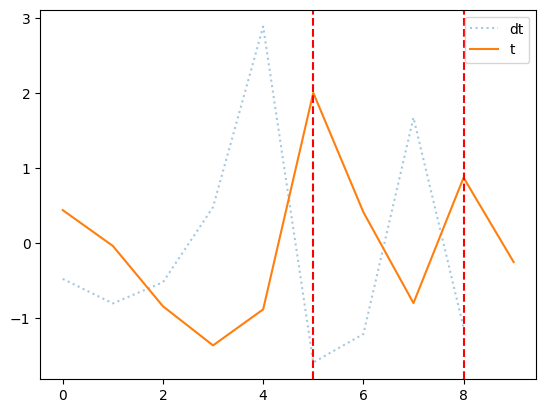

In [ ]:
t= np.random.randn(10)
dt = t[1:] - t[:-1]
#print(t);
print(dt)
peaks = np.where(np.diff(np.sign(dt),axis=0)<0)
print(peaks)
peaks = peaks[0]

xrange = np.arange(len(t))
plt.plot(xrange[:-1],dt, label='dt', linestyle = ':', alpha=0.4)
plt.plot(xrange,t,label = 't')
for peak in peaks:
    plt.axvline(x=peak+1, nplor='r', linestyle='--')
    #plt.axvline(x=peak, nplor='b', linestyle=':')
plt.legend()

## 2D

In [12]:
import gc

class CPU_RFSIM:

    def __init__(self, mean, std_dev, pixel, z_pixel, amplitude, k_power, lamb, n_sigma):
        self.mean = mean
        self.std_dev = std_dev
        self.pixel = pixel
        self.z_pixel = z_pixel
        self.amplitude = amplitude
        self.k_power = k_power
        self.lamb = lamb
        self.n_sigma = n_sigma

    def grf_64f(self):
        # 3D Fast Fourier transform of the white noise
        white_noise = np.random.normal(self.mean, self.std_dev, (self.pixel, self.z_pixel))

        fft_white_noise = np.fft.fftn(white_noise)
        del white_noise

        # Generating FFT momentum
        kx = np.fft.fftfreq(self.pixel)*self.pixel
        ky = np.fft.fftfreq(self.pixel)*self.pixel

        kx_grid, ky_grid = np.meshgrid(kx, ky, sparse = True)
        del kx, ky
        # Genearting FFT momentum 3D array
        # Norm of k

        k_norm = np.sqrt(kx_grid**2 + ky_grid**2 )
        k_norm[0][0]= np.inf  # Regularize divergence at k=0
        del kx_grid, ky_grid

        # Power Spectrum P_k
        power_spectrum = (self.amplitude*(((2*np.pi/self.pixel)*k_norm)**(-1*self.k_power)))  # P(k)=amplitude/k^{power},
        del k_norm

        # Multiply the power spectrum with the transformed white noise to get the realization of the spectrum
        fourier_amplitudes_sqrt =  np.sqrt(power_spectrum, out=power_spectrum)*fft_white_noise
        del power_spectrum, fft_white_noise

        # Perform inverse Fourier transform to obtain the Gaussian random field in the spatial domain
        gaussian_random_field = np.fft.ifftn(fourier_amplitudes_sqrt).real
        del fourier_amplitudes_sqrt
        gc.collect()

        return gaussian_random_field

In [21]:
k_power = 2
pixel = 2**7
n_sigma=25

rfsim = CPU_RFSIM(mean=0, std_dev=1, pixel=pixel, z_pixel=pixel, amplitude=1.0, k_power=k_power, lamb=1.0, n_sigma=n_sigma+1)
    # Generate a Gaussian random field
grf = rfsim.grf_64f()  # grf can be _32f or _64f

grf_std = np.std(grf)

grf = grf/grf_std
#grf= np.abs(grf)    #print(np.std(grf), np.mean(grf))


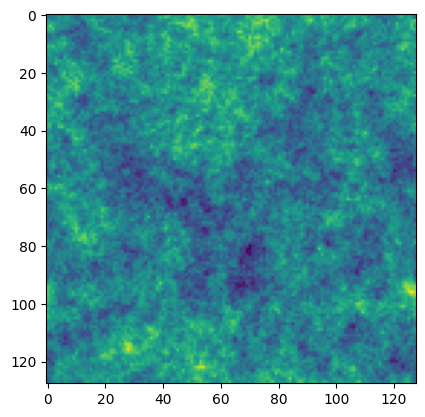

In [22]:
plt.imshow(grf)

In [23]:
# @title Method two using derivatives


# mm=64
# grf = np.random.randn(mm, mm)  # Replace with your actual grf array

grf= np.abs(grf)
cdx_grf = (grf[1: ,:] - grf[:-1, : ])
cdy_grf = (grf[:,1:] - grf[ :,:-1 ])

peaks_dx = np.where(np.diff(np.sign(cdx_grf),axis=0)<0)
peaks_dy = np.where(np.diff(np.sign(cdy_grf),axis=1)<0)

num_peaks_dx = len(peaks_dx[0])
num_peaks_dy = len(peaks_dy[0])

peaks_pos_x = np.array( [ [peaks_dx[0][n]+1,peaks_dx[1][n]] for n in range(num_peaks_dx)] )
peaks_pos_y = np.array( [ [peaks_dy[0][n],peaks_dy[1][n]+1] for n in range(num_peaks_dy)] )

peaks_set_x = set(map(tuple, peaks_pos_x))
peaks_set_y = set(map(tuple, peaks_pos_y))

peaks_2d_fem = peaks_set_y & peaks_set_x

print('Number of peaks found :', len(peaks_2d_fem))
print(peaks_2d_fem)

Number of peaks found : 2439
{(12, 123), (32, 101), (79, 33), (70, 64), (71, 29), (90, 42), (55, 84), (47, 80), (19, 18), (5, 83), (52, 15), (58, 95), (124, 40), (69, 104), (33, 38), (25, 34), (53, 16), (85, 48), (56, 21), (2, 50), (116, 72), (22, 28), (72, 114), (38, 9), (82, 15), (101, 28), (1, 90), (34, 124), (13, 101), (82, 51), (60, 32), (113, 124), (52, 28), (72, 6), (58, 108), (104, 75), (105, 40), (50, 104), (109, 10), (27, 120), (11, 112), (39, 94), (78, 22), (51, 68), (89, 31), (121, 20), (106, 120), (107, 85), (78, 58), (98, 36), (90, 32), (36, 61), (76, 97), (22, 126), (1, 103), (48, 35), (100, 82), (60, 9), (38, 107), (50, 81), (41, 32), (73, 64), (19, 93), (44, 37), (10, 44), (56, 11), (103, 92), (20, 94), (67, 26), (107, 62), (31, 103), (36, 38), (87, 120), (107, 98), (38, 84), (50, 58), (15, 100), (94, 15), (26, 109), (105, 30), (10, 21), (61, 103), (60, 107), (12, 67), (13, 32), (86, 16), (37, 11), (126, 52), (70, 8), (47, 24), (106, 110), (13, 68), (59, 35), (100, 36)

In [24]:
cdx_grf = np.diff(grf, axis=0)
cdy_grf = np.diff(grf, axis=1)

peaks_dx = np.where(np.diff(np.sign(cdx_grf),axis=0)<0)
peaks_dy = np.where(np.diff(np.sign(cdy_grf),axis=1)<0)

peaks_pos_x = np.stack([peaks_dx[0] + 1, peaks_dx[1]], axis=-1)
peaks_pos_y = np.stack([peaks_dy[0], peaks_dy[1] + 1], axis=-1)

peaks_set_x = set(map(tuple, peaks_pos_x))
peaks_set_y = set(map(tuple, peaks_pos_y))

peaks = peaks_set_y & peaks_set_x  # Use intersection for all three sets
print('Number of peaks found :', len(peaks))
print(peaks)

Number of peaks found : 2439
{(12, 123), (32, 101), (79, 33), (70, 64), (71, 29), (90, 42), (55, 84), (47, 80), (19, 18), (5, 83), (52, 15), (58, 95), (124, 40), (69, 104), (33, 38), (25, 34), (53, 16), (85, 48), (56, 21), (2, 50), (116, 72), (22, 28), (72, 114), (38, 9), (82, 15), (101, 28), (1, 90), (34, 124), (13, 101), (82, 51), (60, 32), (113, 124), (52, 28), (72, 6), (58, 108), (104, 75), (105, 40), (50, 104), (109, 10), (27, 120), (11, 112), (39, 94), (78, 22), (51, 68), (89, 31), (121, 20), (106, 120), (107, 85), (78, 58), (98, 36), (90, 32), (36, 61), (76, 97), (22, 126), (1, 103), (48, 35), (100, 82), (60, 9), (38, 107), (50, 81), (41, 32), (73, 64), (19, 93), (44, 37), (10, 44), (56, 11), (103, 92), (20, 94), (67, 26), (107, 62), (31, 103), (36, 38), (87, 120), (107, 98), (38, 84), (50, 58), (15, 100), (94, 15), (26, 109), (105, 30), (10, 21), (61, 103), (60, 107), (12, 67), (13, 32), (86, 16), (37, 11), (126, 52), (70, 8), (47, 24), (106, 110), (13, 68), (59, 35), (100, 36)

In [25]:
# @title Method two by counts

peaks_2d = []
for nn in range(len(peaks_pos_x)):

    x,y = peaks_pos_x[nn][0], peaks_pos_x[nn][1]

    if y > 0 and y < grf.shape[1]-1:
        # if  cdy_grf[x,y-1] > 0 and cdy_grf[x,y] < 0:
        #     peaks_2d.append( [x,y] )

        if  grf[x,y]- grf[x,y+1] > 0 and grf[x,y]- grf[x,y-1]  > 0:
            peaks_2d.append( [x,y] )

print('Number of peaks found :', len(peaks_2d))
print(peaks_2d)

Number of peaks found : 2439
[[1, 1], [1, 4], [1, 6], [1, 10], [1, 13], [1, 27], [1, 29], [1, 31], [1, 39], [1, 41], [1, 59], [1, 65], [1, 77], [1, 85], [1, 90], [1, 95], [1, 103], [1, 112], [1, 114], [2, 16], [2, 19], [2, 21], [2, 34], [2, 50], [2, 63], [2, 71], [2, 74], [2, 76], [2, 80], [2, 82], [2, 91], [2, 98], [2, 102], [2, 110], [2, 117], [3, 12], [3, 17], [3, 20], [3, 25], [3, 30], [3, 42], [3, 46], [3, 56], [3, 62], [3, 67], [3, 73], [3, 78], [3, 84], [3, 87], [3, 93], [3, 96], [3, 101], [3, 109], [3, 114], [3, 121], [3, 124], [4, 1], [4, 5], [4, 22], [4, 32], [4, 36], [4, 49], [4, 59], [4, 61], [4, 64], [4, 69], [4, 104], [4, 106], [4, 116], [4, 126], [5, 2], [5, 10], [5, 19], [5, 27], [5, 33], [5, 45], [5, 51], [5, 57], [5, 65], [5, 71], [5, 77], [5, 80], [5, 83], [5, 89], [5, 91], [5, 93], [5, 99], [5, 118], [5, 121], [6, 5], [6, 8], [6, 20], [6, 22], [6, 41], [6, 46], [6, 55], [6, 66], [6, 85], [6, 88], [6, 92], [6, 97], [6, 108], [6, 111], [6, 115], [6, 120], [7, 4], [7, 

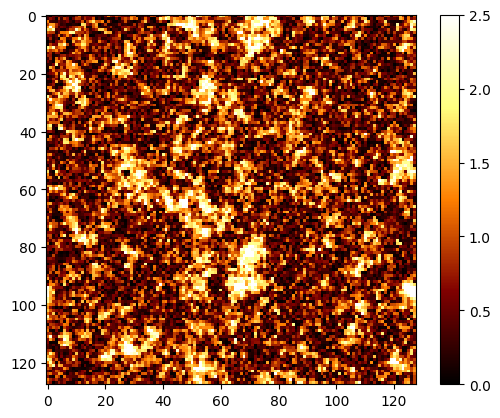

In [26]:
plt.imshow(grf, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

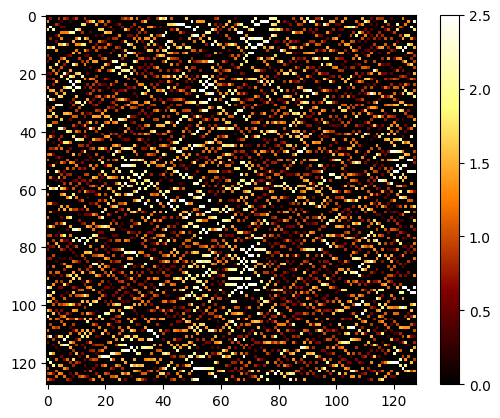

In [27]:
mask = np.zeros(grf.shape)

for (x,y) in peaks_pos_x:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

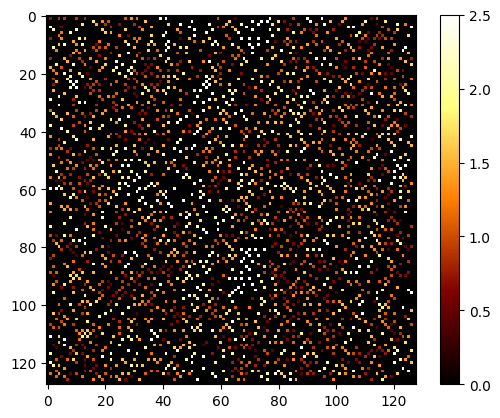

In [28]:
mask = np.zeros(grf.shape)

for (x,y) in peaks_2d:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

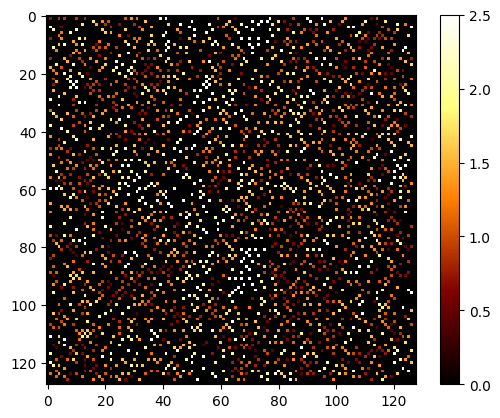

In [29]:
mask = np.zeros(grf.shape)

for (x,y) in peaks_2d_fem:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

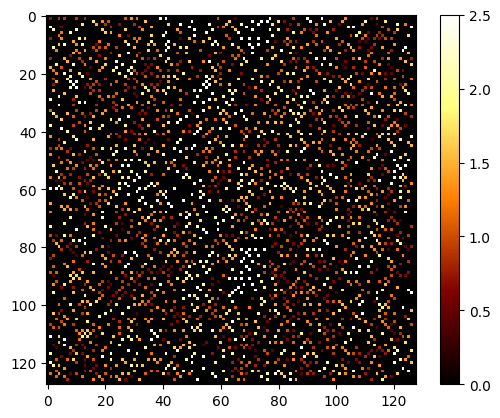

In [30]:
mask = np.zeros(grf.shape)

for (x,y) in peaks:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()